<a href="https://colab.research.google.com/github/discovery-league/Deep-Learning-in-Python/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler

print(tf.__version__)

2.0.0-alpha0


In [0]:
df = pd.read_csv('SLB.csv',delimiter=',',usecols=['Date','Open','High','Low','Close','Volume'])

In [9]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume
0,1981-12-31,13.93750,14.00000,13.875,13.96875,449200
1,1982-01-04,13.75000,13.96875,13.500,13.68750,630400
2,1982-01-05,13.25000,13.46875,13.000,13.00000,1076800
3,1982-01-06,12.87500,12.96875,12.750,12.87500,1560400
4,1982-01-07,12.71875,12.93750,12.500,12.62500,1303600


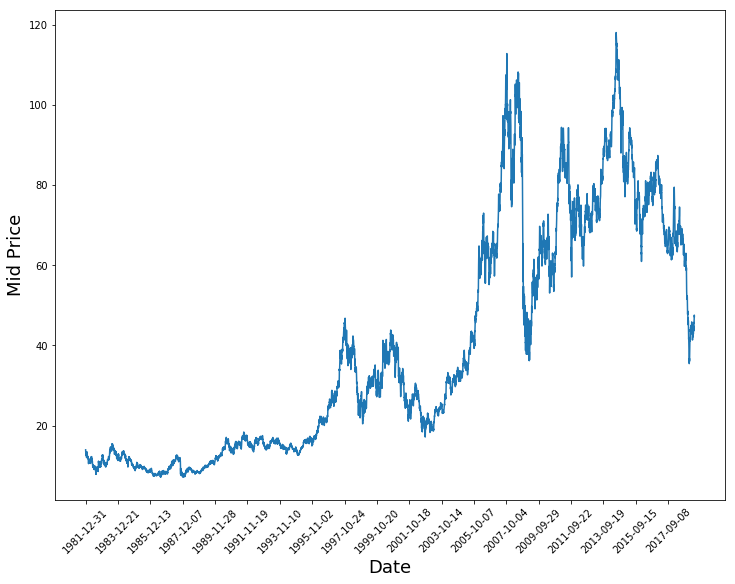

In [11]:
plt.figure(figsize = (12,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
df['mid'] = (df['Low']+df['High'])/2.0

In [0]:
SEQ_LEN = 60
FUTURE_PERIOD_PREDICT = 1
RATIO_TO_PREDICT = 'mid'

In [0]:
def classify(current, future):
  if float(future) > float(current):
    return 1
  else:
    return 0

In [16]:
df['future'] = df[RATIO_TO_PREDICT].shift(-FUTURE_PERIOD_PREDICT)
df['target'] = list(map(classify, df[RATIO_TO_PREDICT],df['future']))
df.head()

,Date,Open,High,Low,Close,Volume,mid,future,target
0,1981-12-31,13.93750,14.00000,13.875,13.96875,449200,13.937500,13.734375,0
1,1982-01-04,13.75000,13.96875,13.500,13.68750,630400,13.734375,13.234375,0
2,1982-01-05,13.25000,13.46875,13.000,13.00000,1076800,13.234375,12.859375,0
3,1982-01-06,12.87500,12.96875,12.750,12.87500,1560400,12.859375,12.718750,0
4,1982-01-07,12.71875,12.93750,12.500,12.62500,1303600,12.718750,12.796875,1
